# Housing

In [17]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.impute import SimpleImputer

In [2]:
# Đọc data
url = 'Housing.csv'
data = pd.read_csv(url)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Kiểm tra nó là phân loại hay biến số

In [6]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [7]:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [8]:
# data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']] = data[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']].applymap({'yes': 1, 'no': 0}.get)
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 1, 'unfurnished': 2,'furnished':3})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  318 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [19]:
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(data)
data = pd.DataFrame(df_imputed, columns=data.columns)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(13)
memory usage: 55.5 KB


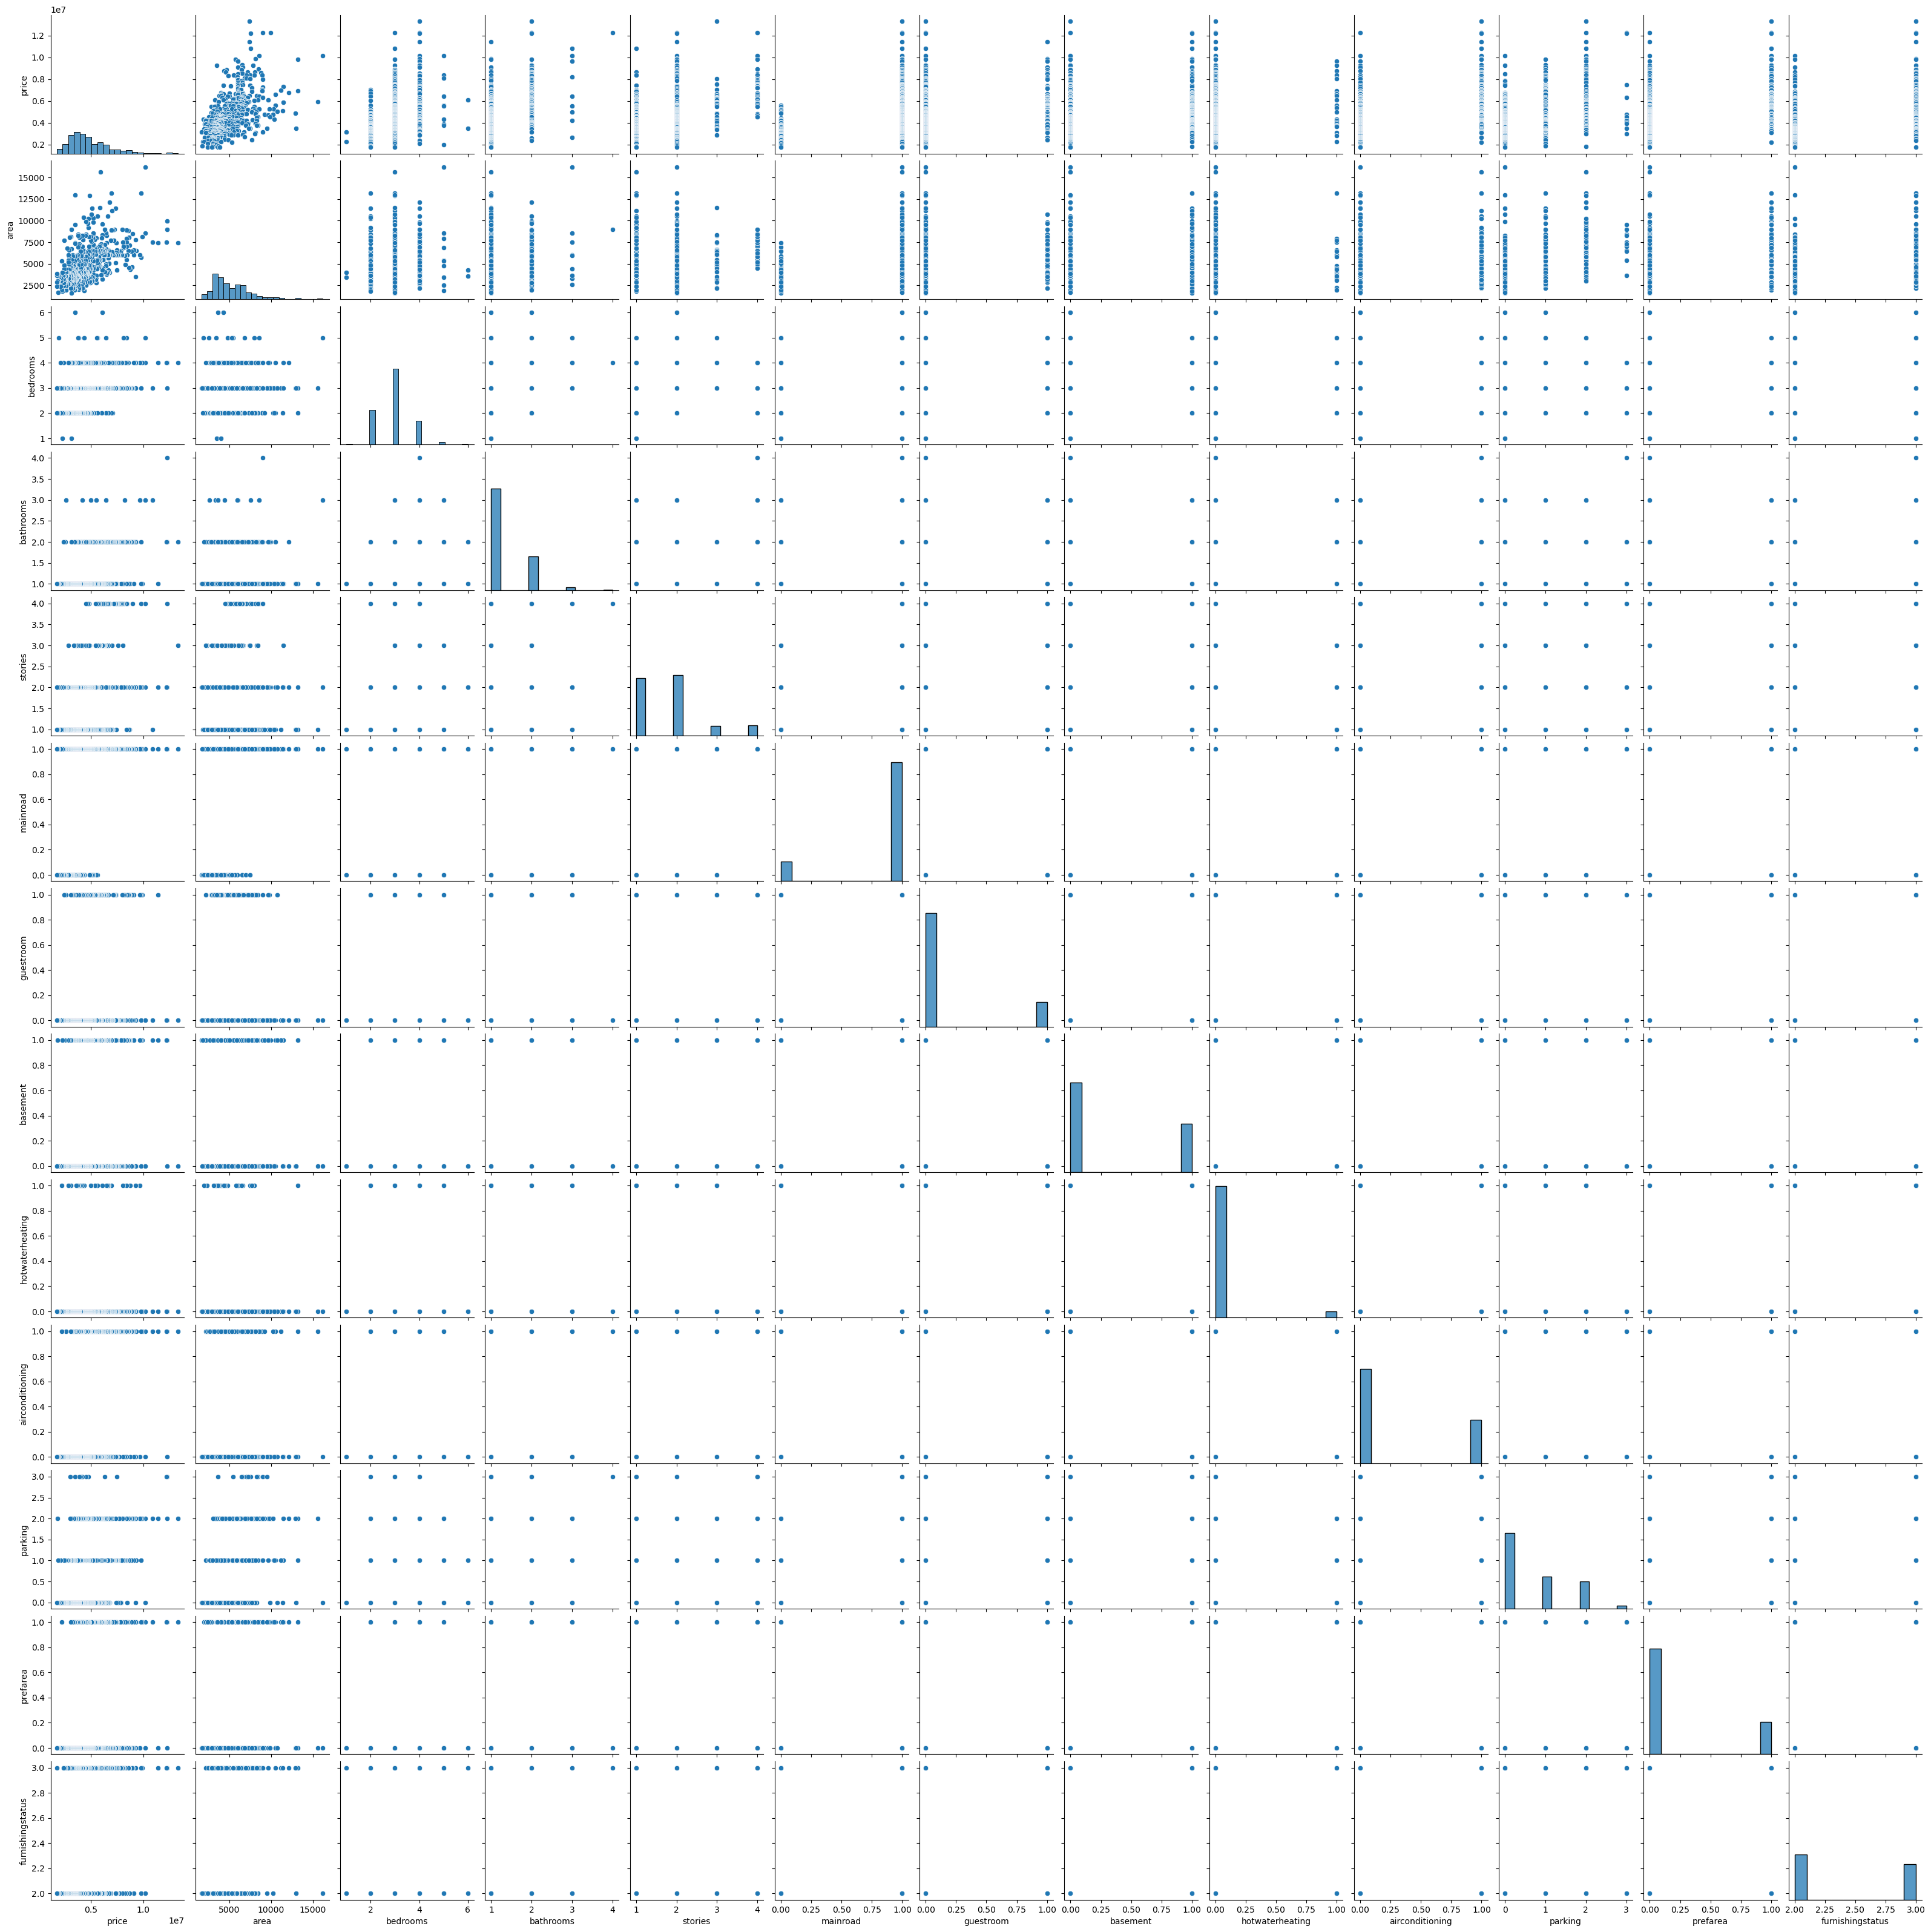

In [13]:
sns.pairplot(data);

### Kiểm tra độ tương quan giữa các giá trị

In [12]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.361154
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.219195
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.149677
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.188972
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.130279
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.202630
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.155428
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.145121
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.040115
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.199666


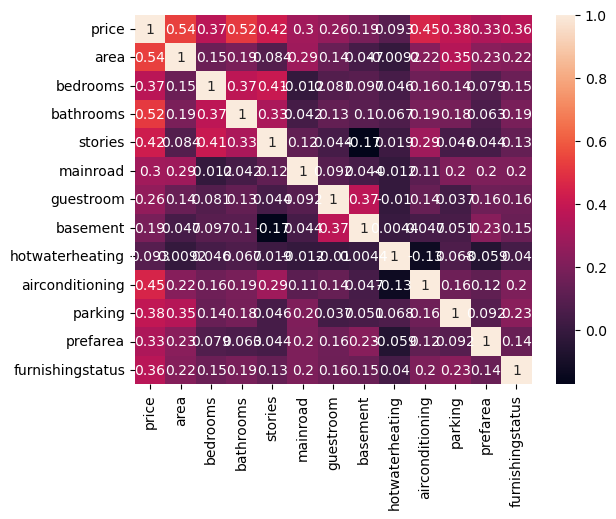

In [14]:
sns.heatmap(data.corr(), annot = True);

### Thử với phương trình bậc 1

In [21]:
X = data.drop(['price'], axis = 1)
y = data['price']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  -1133343.164269344
Hệ só coeffiient là:  [2.44070585e+02 1.20614264e+05 9.89871095e+05 4.50636821e+05
 4.25411730e+05 2.98548867e+05 3.60249781e+05 8.76783516e+05
 8.53144402e+05 2.81072361e+05 6.46866096e+05 4.08755535e+05]
Hệ số độ chính xác:  0.6794819821996367


### Thử với phương trình bậc 3
- Độ chính xác được cải thiện một chút

In [23]:
X = pd.DataFrame([data['area'], data['area']**2, data['area']**3,
                  data['bedrooms'],data['bedrooms']**2, data['bedrooms']**3,
                 data['bathrooms'], data['bathrooms']**2, data['bathrooms']**3,
                data['stories'], data['stories']**2, data['stories']**3,
                data['mainroad'], data['mainroad']**2, data['mainroad']**3,
                data['guestroom'], data['guestroom']**2, data['guestroom']**3,
                data['basement'], data['basement']**2, data['basement']**3,
                data['hotwaterheating'], data['hotwaterheating']**2, data['hotwaterheating']**3,
                data['airconditioning'], data['airconditioning']**2, data['airconditioning']**3,
                data['parking'], data['parking']**2, data['parking']**3,
                data['prefarea'], data['prefarea']**2, data['prefarea']**3,
                data['furnishingstatus'], data['furnishingstatus']**2, data['furnishingstatus']**3
                 ]).T
y = data['price']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  -6213414.479491086
Hệ só coeffiient là:  [ 9.81236221e+02 -9.75772585e-02  3.62572755e-06  1.05064447e+06
 -2.63603615e+05  2.39797891e+04  3.95774436e+06 -1.78689458e+06
  3.24444389e+05 -2.11885693e+05  2.44293390e+05 -2.58242152e+04
  1.08025551e+05  1.08025551e+05  1.08025551e+05  7.21862838e+04
  7.21862838e+04  7.21862838e+04  1.32548983e+05  1.32548983e+05
  1.32548983e+05  2.76881964e+05  2.76881964e+05  2.76881964e+05
  2.62483275e+05  2.62483275e+05  2.62483275e+05  2.41357450e+05
  2.52724984e+05 -1.07057045e+05  2.33088432e+05  2.33088432e+05
  2.33088432e+05  3.45362676e+05  8.16779694e+05 -2.08988721e+05]
Hệ số độ chính xác:  0.694634719758699


### Thử với phương trình bậc 5
- Hệ số chính xác giảm có thể do **overfitting**

In [25]:
X = pd.DataFrame([data['area'], data['area']**2, data['area']**3, data['area']**4, data['area']**5,
                  data['bedrooms'],data['bedrooms']**2, data['bedrooms']**3,data['bedrooms']**4, data['bedrooms']**5,
                 data['bathrooms'], data['bathrooms']**2, data['bathrooms']**3,  data['bathrooms']**4, data['bathrooms']**5,
                data['stories'], data['stories']**2, data['stories']**3,data['stories']**4, data['stories']**5,
                data['mainroad'], data['mainroad']**2, data['mainroad']**3, data['mainroad']**4, data['mainroad']**5,
                data['guestroom'], data['guestroom']**2, data['guestroom']**3, data['guestroom']**4, data['guestroom']**5,
                data['basement'], data['basement']**2, data['basement']**3, data['basement']**4, data['basement']**5,
                data['hotwaterheating'], data['hotwaterheating']**2, data['hotwaterheating']**3, data['hotwaterheating']**4, data['hotwaterheating']**5,
                data['airconditioning'], data['airconditioning']**2, data['airconditioning']**3,data['airconditioning']**4, data['airconditioning']**5,
                data['parking'], data['parking']**2, data['parking']**3, data['parking']**4, data['parking']**5,
                data['prefarea'], data['prefarea']**2, data['prefarea']**3, data['prefarea']**4, data['prefarea']**5,
                data['furnishingstatus'], data['furnishingstatus']**2, data['furnishingstatus']**3, data['furnishingstatus']**4, data['furnishingstatus']**5
                 ]).T
y = data['price']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  2425508.3922428014
Hệ só coeffiient là:  [ 1.09827278e-04  1.22529215e-01  2.96650749e-06 -2.04381663e-09
  9.23983112e-14 -6.86423820e-09 -4.05990490e-08 -1.97686793e-07
 -9.28272798e-07 -4.33263718e-06 -5.68459008e-09 -2.42182965e-08
 -8.53966845e-08 -2.90555973e-07 -9.91160430e-07 -1.38602665e-09
 -3.85912380e-09 -5.48640931e-09  1.09039073e-08  1.41371849e-07
  9.76111521e-09  9.76111521e-09  9.76111521e-09  9.76111521e-09
  9.76111521e-09  1.34318850e-09  1.34318850e-09  1.34318850e-09
  1.34318850e-09  1.34318850e-09 -4.78650107e-09 -4.78650107e-09
 -4.78650107e-09 -4.78650107e-09 -4.78650107e-09  1.19653120e-09
  1.19653120e-09  1.19653120e-09  1.19653120e-09  1.19653120e-09
  4.00365398e-09  4.00365398e-09  4.00365398e-09  4.00365398e-09
  4.00365398e-09 -4.72524755e-11 -9.83854894e-09 -4.13691438e-08
 -1.40274339e-07 -4.45616748e-07 -7.86591567e-09 -7.86591567e-09
 -7.86591567e-09 -7.86591567e-09 -7.86591567e-09 -8.56803287e-10
 -5.31542413e-09 -2.39531952